# GRIP  
# THE SPARKS FOUNDATION(july2021)
TSF-Task 1

# **Prediction using Supervised ML**
Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## By- SUBHAM NANDA

# Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# loading the data 

In [ ]:
dt=pd.read_csv("http://bit.ly/w-data")

# Exploratory Data Analysis

In [ ]:
dt.shape

(25, 2)

In [ ]:
dt.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dt.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# checking for null values
dt.isnull().sum()

Hours     0
Scores    0
dtype: int64

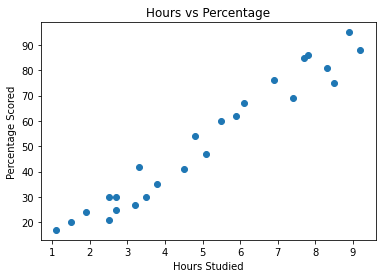

In [ ]:
# Scatter plot of Hours vs Percentage
plt.scatter(dt['Hours'],dt['Scores']) 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

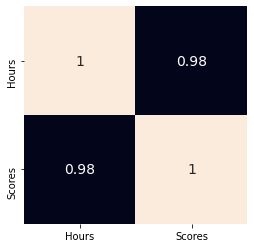

In [ ]:
# Correlation Matrix
plt.figure(figsize=(4,4))
sns.heatmap(dt.corr(), annot=True, cbar=False, annot_kws={'size':14})
plt.show()

we can say that there is positive linear relation between the number of hours studied and percentage scored

# Preparing the data

In [ ]:
x = dt.iloc[:, :-1].values  
y = dt.iloc[:, 1].values

In [ ]:
# Splitting the dataset into train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Model Building

In [ ]:
# training the model
LR= LinearRegression()
LR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

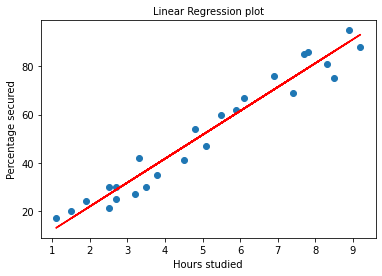

In [ ]:
# Plotting the regression line
line = LR.coef_*X + LR.intercept_
plt.title('Linear Regression plot', size=10)
plt.ylabel('Percentage secured', size=10)
plt.xlabel('Hours studied', size=10)
plt.scatter(x,y)
plt.plot(x,line,color='red')
plt.show()

Testing the model

In [ ]:
# predicting the scores on test data 

y_pred =LR.predict(x_test)

In [ ]:
# Actual vs Predicted comparison

df=pd.DataFrame({'Actual_Score': y_test,'Predicted_Score': y_pred})
df

,Actual_Score,Predicted_Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


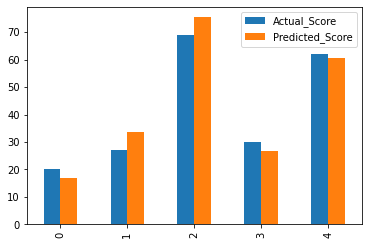

In [ ]:
# bar graph comparing actual vs predicted
df.plot(kind='bar')
plt.show()

# Predicting score of a student who studies for 9.25 hrs/ day

In [ ]:
hrs = 9.25    # given value
pred =LR.predict([[hrs]])
print("No of Hours={}".format(hrs))
print("Predicted Score={}".format(pred[0]))

No of Hours=9.25
Predicted Score=93.69173248737539


**The predicted score of a student who studies for 9.25 hours is 93.69%**

# Model Evaluation

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

print('R Squared value', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
R Squared value 0.9454906892105354


**Thus we can conclude that our model predicts score with Mean Absolute Error 4.18**

**Also with having R-Squared value of 0.945, which shows good model performance.**

# Thanks 